In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

The air quality index (AQI) is a mesaure of air pollution in a given area and is rated on a scale of 0-500. Its concentration of five major air pollutants:


1.   Particulate Matter (PM2.5 and PM10)
2.   Ozone (O3)
3.   Nitrogen Dioxide (NO2)
4.   Carbon Monoxide (CO)
5.   Sulfur Dioxide (SO2)

Typically, countries should aim for a 'Good' status, that being 0-50. Unhealthy levels is usually anything above 101, and dangerous is anything over 300.

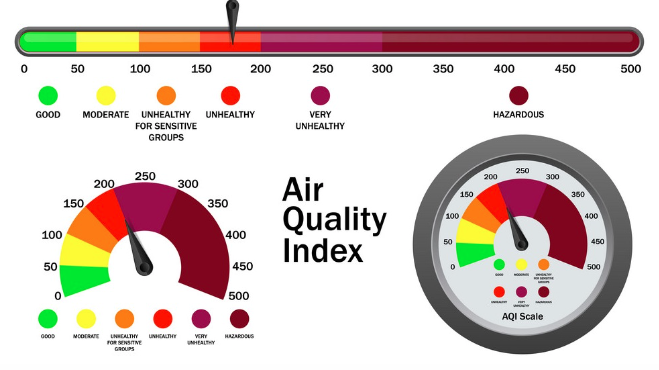

For clarity, particulate matter is extremely small particles in the air, including the burning of fossil fuels, industrial activity, agriculture, veichle exhausts, and construction/demolishin activity.


I would love to identify the highest levels of AQI to determine their effects on the planet, I may also look in to the level of veichle exhaust effects this scale if I can find the relevant data. We are going to try an predict the future of the AQI, determining which countries are the leading contributors to air pollution and if they are likely to slow down (probably not).


---

Lets begin by opeing our data set from Kaggle.com =>

In [ ]:
AQI = pd.read_csv('data_date.csv', sep=',')
AQI

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
17628,2025-02-06,United Kingdom of Great Britain and Northern I...,Moderate,87
17629,2025-02-06,United States of America,Unhealthy for Sensitive Groups,109
17630,2025-02-06,Uzbekistan,Moderate,68
17631,2025-02-06,Vatican,Moderate,61


In [ ]:
AQI.shape

(17633, 4)

In [ ]:
AQI.dtypes

,0
Date,object
Country,object
Status,object
AQI Value,int64




---


We need to change the Date column to a datetime type for our timeline animation to work. We can also be extra cool and change the Status column to a category type, which will benefit when looking at this specifically.

---



In [ ]:
AQI['Date'] = pd.to_datetime(AQI['Date'])
AQI['Status'] = AQI['Status'].astype('category')
AQI.dtypes

,0
Date,datetime64[ns]
Country,object
Status,category
AQI Value,int64



---

Lets start with a choropleth animation, showing a timeline of the AQI index throughout the global map


---


In [ ]:
fig1 = px.choropleth(AQI,
                    locations='Country',
                    locationmode='country names',
                    color='AQI Value',
                    hover_name='Country',
                    animation_frame='Date',
                    color_continuous_scale='RdYlGn_r',
                    range_color=[0,300]) #change this to show exaggeration during presentation <3

fig1.update_layout(title_text='Air Quality Index (AQI) 2022-2025')

fig1.show()

Can we gp fpr Lunch soon

---


This is a great animation, showing the change in Air Quality for a period of 3 years, but it is a bit allued's how impactful this data is. For example, countries should aim for an AQI of 0-50 as an acceptable level of air quality, however most countires have a level higher than 50 while still being the colour green. This is why we made the colour range 0 - 300 to show these exaggerations better. I should also mention that some of the data is missing, our original data set covers day by day for some values, the animation removes any empty sets of data.



---




---

We are in 2025, so most the data for this year only contains January... so not very fufilling. We need to identify averages for the years 2023 and 2024 if we are going to find any comparable data from each country.

---



In [ ]:
average_2023 = AQI[AQI['Date'].dt.year == 2023].groupby('Country')['AQI Value'].mean()

average_2023

,AQI Value
Country,
Albania,25.681818
Algeria,51.428571
Andorra,26.000000
Angola,109.636364
Argentina,30.590909
...,...
Uzbekistan,63.727273
Vatican,44.272727
Venezuela,15.545455


In [ ]:
lowest_AQI_value = average_2023.min()
country_with_lowest_AQI = average_2023.idxmin()
print(f"The country with the lowest average AQI in 2023 is: {country_with_lowest_AQI}, with an AQI of {lowest_AQI_value}")

highest_AQI_value = average_2023.max()
country_with_highest_AQI = average_2023.idxmax()
print(f"The country with the highest average AQI in 2023 is: {country_with_highest_AQI}, with an AQI of {highest_AQI_value}")

The country with the lowest average AQI in 2023 is: Guam, with an AQI of 4.277777777777778
The country with the highest average AQI in 2023 is: China, with an AQI of 229.1818181818182


In [ ]:
average_2024 = AQI[AQI['Date'].dt.year == 2024].groupby('Country')['AQI Value'].mean()

average_2024

,AQI Value
Country,
Albania,26.741935
Algeria,51.714286
Andorra,25.032258
Argentina,37.387097
Armenia,56.000000
...,...
Uzbekistan,81.935484
Vatican,49.032258
Venezuela,20.066667


In [ ]:
lowest_AQI_value_24 = average_2024.min()
country_with_lowest_AQI_24 = average_2024.idxmin()
print(f"The country with the lowest average AQI in 2024 is: {country_with_lowest_AQI_24}, with an AQI of {lowest_AQI_value_24}")

highest_AQI_value_24 = average_2024.max()
country_with_highest_AQI_24 = average_2024.idxmax()
print(f"The country with the highest average AQI in 2024 is: {country_with_highest_AQI_24}, with an AQI of {highest_AQI_value_24}")

The country with the lowest average AQI in 2024 is: Cayman Islands, with an AQI of 7.833333333333333
The country with the highest average AQI in 2024 is: India, with an AQI of 286.2903225806452




---



In [ ]:
average_2024_map = average_2024[average_2024 < 50]

fig2024 = px.choropleth(average_2024_map,
                        locations=average_2024_map.index,
                        locationmode="country names",
                        color='AQI Value',
                        hover_name=average_2024_map.index,
                        color_continuous_scale='RdYlGn_r',
                        range_color=[0, 100],
                        title='Average AQI Value per Country in 2024 (Values < 50)'
)

fig2024.show()

In [ ]:
average_2024_map = average_2024[average_2024 > 50]

fig2024_max = px.choropleth(average_2024_map,
                        locations=average_2024_map.index,
                        locationmode="country names",
                        color='AQI Value',
                        hover_name=average_2024_map.index,
                        color_continuous_scale='RdYlGn_r',
                        range_color=[0, 100],
                        title='Average AQI Value per Country in 2024 (Values > 50)'
)

fig2024_max.show()



---

We can write a code to speicifcally find the top 5 contributors to air pollution, this will help in further analysing the potential for countries to develop changes in the future.

---



In [ ]:
top_5_highest = average_2024.nlargest(5)
print("Top 5 countries with highest AQI in 2024:")
print(top_5_highest)

Top 5 countries with highest AQI in 2024:
Country
India                       286.290323
China                       164.677419
Bangladesh                  152.935484
United States of America    146.096774
Iran                        144.838710
Name: AQI Value, dtype: float64




---


I want to make an Infographic for data visualisation purposes, we can look at the top 5 countries for AQI and find percentages between the average AQI in the last 2 years (because again, 2025 is the Now Now). We can also .get the data and have easier access when we want to make predictions and other reasons (secret reasons).


---



# INDIA

In [ ]:
india_AQI_by_year = {}

for year in AQI['Date'].dt.year.unique():
  india_AQI_by_year[year] = AQI[(AQI['Date'].dt.year == year) & (AQI['Country'] == 'India')]['AQI Value'].mean()

for year, avg_aqi in india_AQI_by_year.items():
  print(f"Average AQI for India in {year}: {avg_aqi}")

Average AQI for India in 2022: 175.0
Average AQI for India in 2023: 215.27272727272728
Average AQI for India in 2024: 286.2903225806452
Average AQI for India in 2025: 294.8333333333333


In [ ]:
india_AQI = pd.DataFrame(list(india_AQI_by_year.items()), columns=['Year', 'Average AQI']) #This takes the india_AQI_by_year from above

fig2 = px.line(india_AQI, x='Year', y='Average AQI', title='India Average AQI by Year',
             color_discrete_sequence=['lightcoral'])

fig2.update_xaxes(dtick=1) #for whatever reason, the year on x-axis kept having .5 multiples

fig2.show()

In [ ]:
print(average_2023.get('India'))
print(average_2024.get('India'))
india_avg_2023 = average_2023.get('India')
india_avg_2024 = average_2024.get('India')

if india_avg_2023 is not None and india_avg_2024 is not None:
  percentage_increase = ((india_avg_2024 - india_avg_2023) / india_avg_2023) * 100
  print(f"Difference in average AQI for India between 2024 and 2023: {percentage_increase}%") #for infographic
else:
  print("No data on India")

215.27272727272728
286.2903225806452
Difference in average AQI for India between 2024 and 2023: 32.98959241499564%


# CHINA

In [ ]:
china_AQI_by_year = {}

for year in AQI['Date'].dt.year.unique():
  china_AQI_by_year[year] = AQI[(AQI['Date'].dt.year == year) & (AQI['Country'] == 'China')]['AQI Value'].mean()

for year, avg_aqi in china_AQI_by_year.items():
  print(f"Average AQI for China in {year}: {avg_aqi}")

Average AQI for China in 2022: 156.64788732394365
Average AQI for China in 2023: 229.1818181818182
Average AQI for China in 2024: 164.67741935483872
Average AQI for China in 2025: 218.16666666666666


In [ ]:
china_AQI = pd.DataFrame(list(china_AQI_by_year.items()), columns=['Year', 'Average AQI'])

fig3 = px.line(china_AQI, x='Year', y='Average AQI', title='China Average AQI by Year',
             color_discrete_sequence=['lightcoral'])

fig3.update_layout(
    plot_bgcolor='rgba(0,0,0,0)', #for infographic
)

fig3.update_xaxes(dtick=1)

fig3.show()

In [ ]:
print(average_2023.get('China'))
print(average_2024.get('China'))
china_avg_2023 = average_2023.get('China')
china_avg_2024 = average_2024.get('China')

if china_avg_2023 is not None and china_avg_2024 is not None:
  percentage_increase = ((china_avg_2024 - china_avg_2023) / china_avg_2023) * 100
  print(f"Difference in average AQI for China between 2024 and 2023: {percentage_increase}%")
else:
  print("No data on China")

229.1818181818182
164.67741935483872
Difference in average AQI for China between 2024 and 2023: -28.145513173215953%


# BANGLADESH

In [ ]:
bangladesh_AQI_by_year = {}

for year in AQI['Date'].dt.year.unique():
  bangladesh_AQI_by_year[year] = AQI[(AQI['Date'].dt.year == year) & (AQI['Country'] == 'Bangladesh')]['AQI Value'].mean()

for year, avg_aqi in bangladesh_AQI_by_year.items():
  print(f"Average AQI for Bangladesh in {year}: {avg_aqi}")

Average AQI for Bangladesh in 2022: 141.0
Average AQI for Bangladesh in 2023: 129.0909090909091
Average AQI for Bangladesh in 2024: 152.93548387096774
Average AQI for Bangladesh in 2025: 310.0


In [ ]:
bangladesh_AQI = pd.DataFrame(list(bangladesh_AQI_by_year.items()), columns=['Year', 'Average AQI'])

fig4 = px.line(bangladesh_AQI, x='Year', y='Average AQI', title='Bangladesh Average AQI by Year',
             color_discrete_sequence=['lightcoral'])

fig4.update_xaxes(dtick=1)

fig4.show()

In [ ]:
print(average_2023.get('Bangladesh'))
print(average_2024.get('Bangladesh'))
bangladesh_avg_2023 = average_2023.get('Bangladesh')
bangladesh_avg_2024 = average_2024.get('Bangladesh')

if bangladesh_avg_2023 is not None and bangladesh_avg_2024 is not None:
  percentage_increase = ((bangladesh_avg_2024 - bangladesh_avg_2023) / bangladesh_avg_2023) * 100
  print(f"Difference in average AQI for Bangladesh between 2024 and 2023: {percentage_increase}%")
else:
  print("No data on Bangladesh")

129.0909090909091
152.93548387096774
Difference in average AQI for Bangladesh between 2024 and 2023: 18.47114947751022%


# UNITED STATES

In [ ]:
usa_AQI_by_year = {}

for year in AQI['Date'].dt.year.unique():
  usa_AQI_by_year[year] = AQI[(AQI['Date'].dt.year == year) & (AQI['Country'] == 'United States of America')]['AQI Value'].mean()

for year, avg_aqi in usa_AQI_by_year.items():
  print(f"Average AQI for United States in {year}: {avg_aqi}")

Average AQI for United States in 2022: 103.35211267605634
Average AQI for United States in 2023: 164.0909090909091
Average AQI for United States in 2024: 146.09677419354838
Average AQI for United States in 2025: 121.5


In [ ]:
usa_AQI = pd.DataFrame(list(usa_AQI_by_year.items()), columns=['Year', 'Average AQI'])

fig5 = px.line(usa_AQI, x='Year', y='Average AQI', title='United States Average AQI by Year',
             color_discrete_sequence=['lightcoral'])

fig5.update_xaxes(dtick=1)

fig5.show()

# IRAN

In [ ]:
iran_AQI_by_year = {}

for year in AQI['Date'].dt.year.unique():
  iran_AQI_by_year[year] = AQI[(AQI['Date'].dt.year == year) & (AQI['Country'] == 'Iran')]['AQI Value'].mean()

for year, avg_aqi in iran_AQI_by_year.items():
  print(f"Average AQI for Iran in {year}: {avg_aqi}")

Average AQI for Iran in 2022: 161.9718309859155
Average AQI for Iran in 2023: 139.66666666666666
Average AQI for Iran in 2024: 144.83870967741936
Average AQI for Iran in 2025: 130.16666666666666


In [ ]:
iran_AQI = pd.DataFrame(list(iran_AQI_by_year.items()), columns=['Year', 'Average AQI'])

fig6 = px.line(iran_AQI, x='Year', y='Average AQI', title='Iran Average AQI by Year',
             color_discrete_sequence=['lightcoral'])

fig6.update_xaxes(dtick=1)

fig6.show()

Groovy beans (albeit we all praise and miss Larry Tesler)
Heres a fun infographic to display all this data.
also not really a good inforgraphic because I do not hvae access to the Adobe suite, and also Canva.com is frustrating.

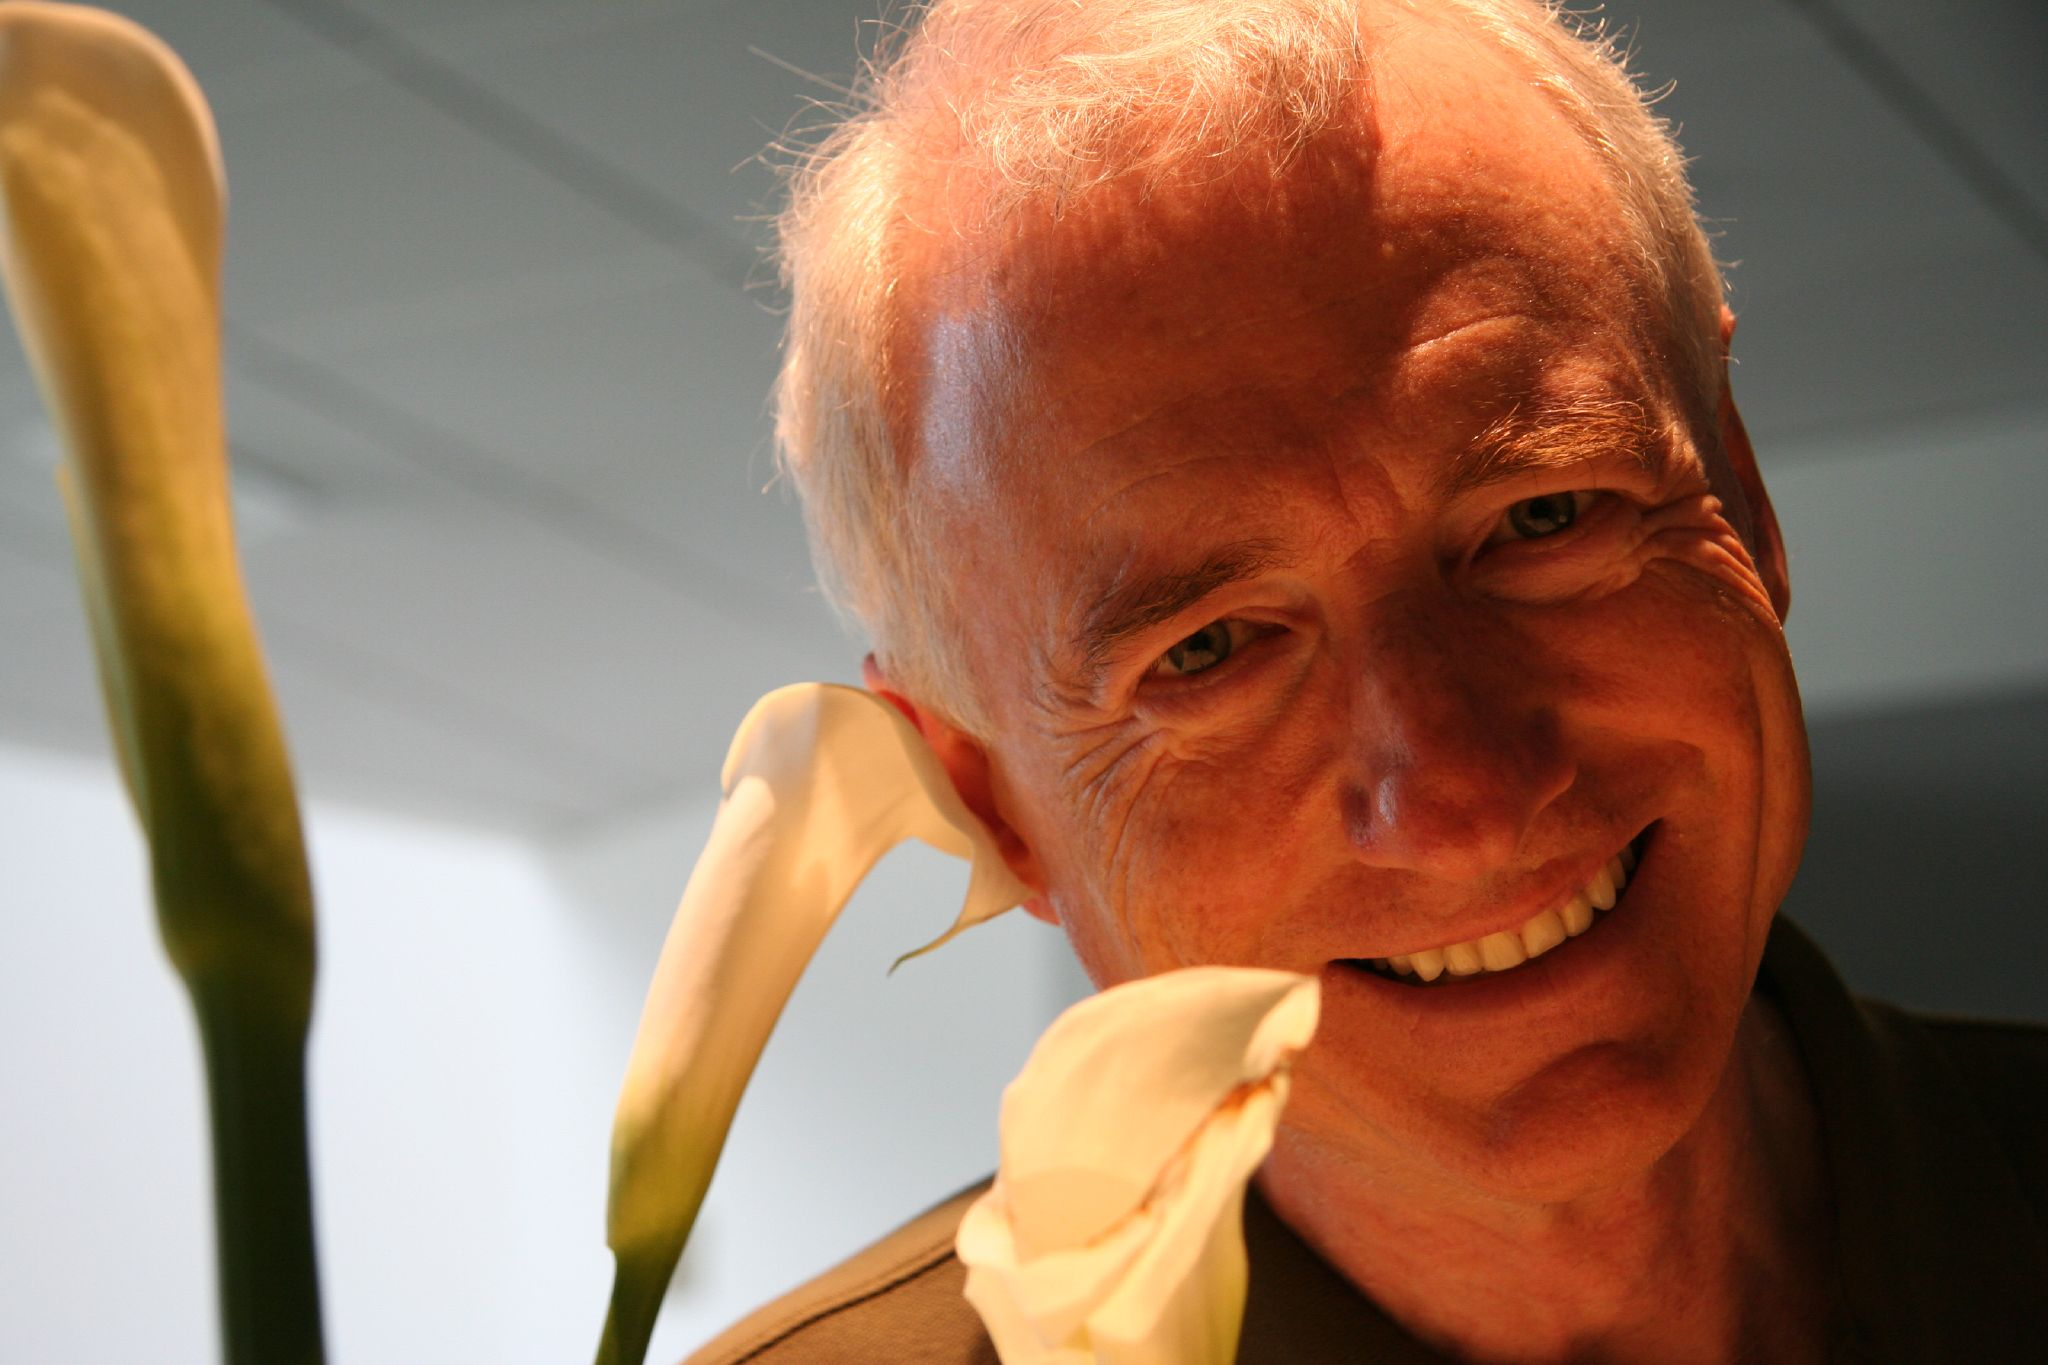

In [ ]:
india_AQI['Country'] = 'India'
china_AQI['Country'] = 'China'
bangladesh_AQI['Country'] = 'Bangladesh'
usa_AQI['Country'] = 'USA'
iran_AQI['Country'] = 'Iran'

merge = pd.concat([india_AQI, china_AQI, bangladesh_AQI, usa_AQI, iran_AQI])

topFive = merge.reset_index(drop=True)

In [ ]:
fig_merge = px.line(topFive, x='Year', y='Average AQI', color='Country', title='AQI Values for Leading Countries in Poor Quality')
fig_merge.show()

How to re-size image attachment in Google Colab...

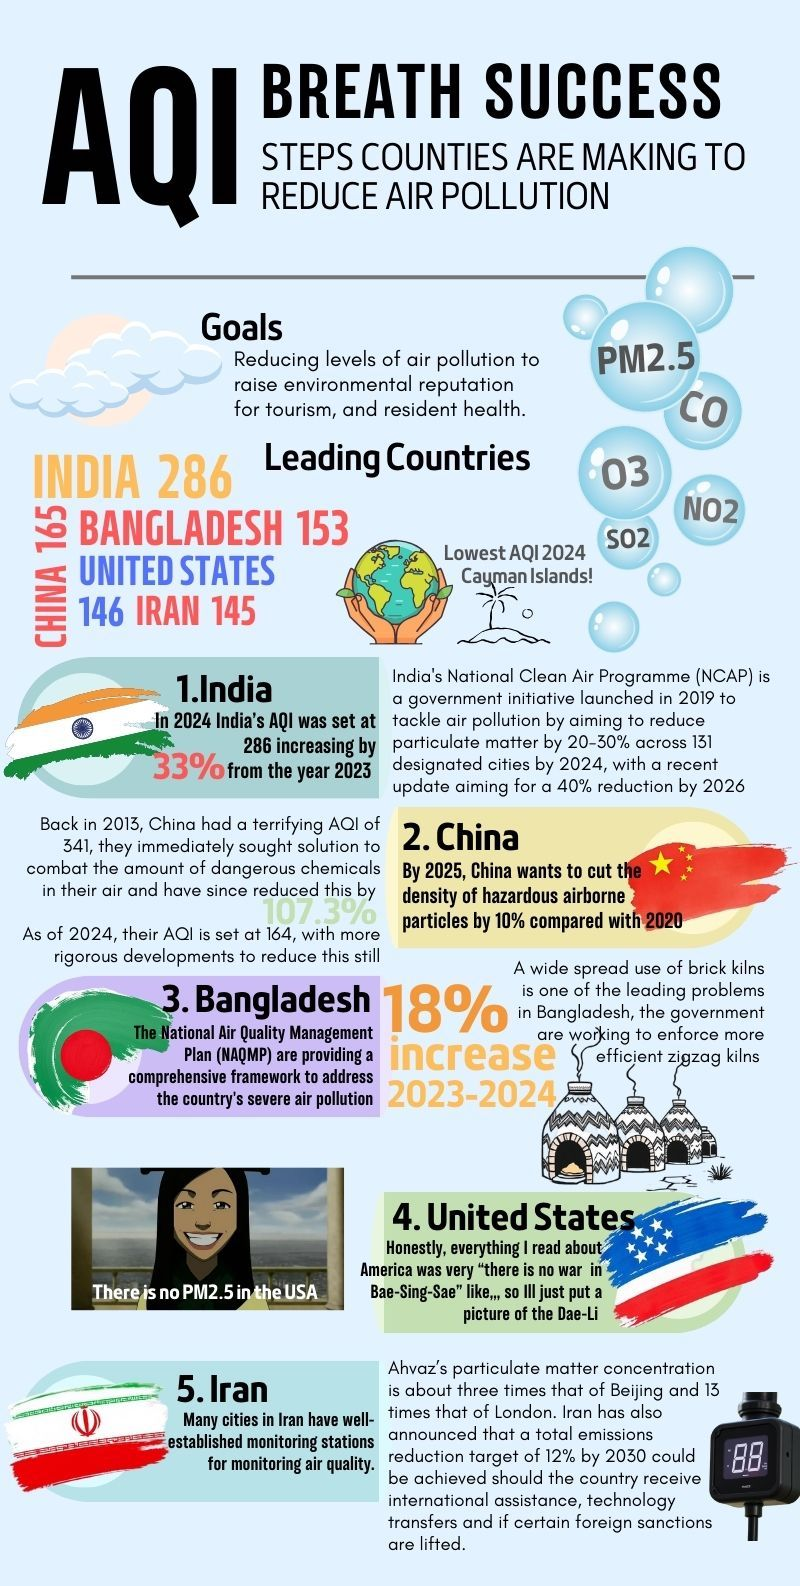



---



Based on the data we have collected so far, and doing further research in to the countries who are aiming to reduce their Air Quality Index, lets start to use linear regression and predict the next 3 years of data.

For example, China aims to have reduced most of it AQI by 10% in the year 2025 - which we are currently in. A confidence interval (CI) gives a range of possible values where we expect the true value to fall, based on our sample data. In the case of linear regression, it tells us how much uncertainty there is in our predictions.

In [ ]:
china_aqi_for_regression = china_AQI[['Year', 'Average AQI']].copy()
china_aqi_for_regression['Year'] = china_aqi_for_regression['Year'].astype(int)

model = LinearRegression()
X = china_aqi_for_regression[['Year']]
y = china_aqi_for_regression['Average AQI']
model.fit(X, y)

future_years = pd.DataFrame(range(china_aqi_for_regression['Year'].min(), 2028), columns=["Year"])
predicted_aqi = model.predict(future_years)

from sklearn.utils import resample

n_bootstraps = 1000 # based on 1000 resamples
predictions_bootstrap = np.zeros((n_bootstraps, len(future_years)))

for i in range(n_bootstraps):
    X_resampled, y_resampled = resample(X, y)
    model_resampled = LinearRegression().fit(X_resampled, y_resampled)
    predictions_bootstrap[i] = model_resampled.predict(future_years)

ci_lower = np.percentile(predictions_bootstrap, 10, axis=0)
ci_upper = np.percentile(predictions_bootstrap, 90, axis=0)

fig7 = go.Figure()

fig7.add_trace(go.Scatter(
    x=future_years.values.flatten(),
    y=predicted_aqi,
    mode='lines',
    name='Predicted AQI',
    line=dict(color='lightcoral', width=2)
))

fig7.add_trace(go.Scatter(
    x=np.concatenate([future_years.values.flatten(), future_years.values.flatten()[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 160, 122, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    name='80% Confidence Interval'
))

fig7.update_layout(
    title="China AQI Forecast with Confidence Interval",
    xaxis_title="Year",
    yaxis_title="Average AQI",
    showlegend=True
)

fig7.show()

The red line is the predicted AQI trend for China based on past data and the shaded area represents the 95% confidence interval, meaning the actual AQI in future years is likely to fall within this range.

A narrower band means a more certain prediction, while a wider band suggests more uncertainty.



---

China wants to reduce their AQI by 10% in the year 2025, there is still several months to go by but if we use the data we have we can see how well they have achieved this so far. First we need to see if we have any 2020 data on China (we do not) and then go off the first year we do have data on to see how well they have done so far.

In [ ]:
print(china_AQI['Year'].unique())

[2022 2023 2024 2025]


In [ ]:
china_2022_aqi = china_AQI.loc[china_AQI['Year'] == 2022, 'Average AQI'].values[0]

# Calculating target for 2025 (10%)
target_aqi_2025 = china_2022_aqi * 0.90

actual_aqi_2024 = 164

reduction_achieved = china_2022_aqi - actual_aqi_2024
reduction_target = china_2022_aqi - target_aqi_2025

on_track = actual_aqi_2024 <= target_aqi_2025

print(f"China's 2022 AQI: {china_2022_aqi}")
print(f"Target AQI for 2025 (10% reduction): {target_aqi_2025:.2f}")
print(f"Actual AQI in 2024: {actual_aqi_2024}")
print(f"Reduction achieved so far: {reduction_achieved:.2f} (Target: {reduction_target:.2f})")
print(f"Has China met their 2025 goal? {'YES' if on_track else 'NO'}")

China's 2022 AQI: 156.64788732394365
Target AQI for 2025 (10% reduction): 140.98
Actual AQI in 2024: 164
Reduction achieved so far: -7.35 (Target: 15.66)
Has China met their 2025 goal? NO


# **The End?**

This is for funs, ask the people to name a country and we can see where it falls under ???

In [ ]:
AQI["Country"].value_counts().head(1)

,count
Country,
Albania,130


In [ ]:
# Fiter for a spific country ( replace: [AQI["Country"] == country_name] )
country_name = "Albania"
df_country = AQI[AQI["Country"] == country_name]

df_country = df_country.sort_values("Date")

fig8 = px.scatter(
    df_country,
    x="Date",
    y="AQI Value",
    trendline="ols",  # Ordinary least squares
    title=f"AQI Trend & Prediction for {country_name}",
    labels={"AQI Value": "Air Quality Index (AQI)", "Date": "Year"},
)

fig8.show()

NameError: name 'AQI' is not defined